In [136]:
import math
from scipy import stats
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

Use scipy.stats to create a random variable A, which follows a Normal distribution A∼N(μ=5,σ**2=10)

In [137]:
mean = 5
sd = np.sqrt(10)
A = stats.norm(loc=mean, scale=sd)

Using A, find the probability density at a single point, say a=4.

In [138]:
#Probability density at p1(i.e. a)
p1 = 4
res_1 = A.pdf(p1)

print("Probability density at 4 is ", res_1)

Probability density at 4 is  0.12000389484301362


Using A, find the cumulative density at the mean.

In [139]:
res_2 = A.cdf(mean)

print("Probability density at the mean is ", res_2)

Probability density at the mean is  0.5


Using A, generate 10 random samples.

In [140]:
samples = 10
res_3 = A.rvs(size=samples)

print("Random samples from  A", res_3)

Random samples from  A [ 3.0588399   8.25733709  4.61314274  4.0108011   6.62983195  4.71275872
 10.53883059  1.31948709  6.40709333  3.65324455]


Plot the pdf given by A

If we generate the points at equal intervals, the optimal shape of the Gaussian curve is immediately apparent. However, if we generate the points randomly, we observe that increasing their number improves the likelihood of the curve approaching its ideal form. Additionally, the points are generated between -5 and +5 standard deviations because beyond this range, the value is practically zero. It would even make sense to stop at -4 and +4 standard deviations, but I extended the range purely for aesthetic reasons in the final plot.

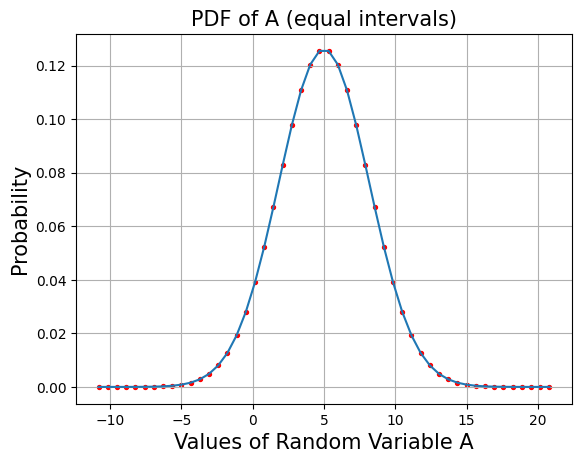

In [141]:
x = np.linspace(mean - 5*sd, mean + 5*sd, 50)
y = A.pdf(x)

plt.plot(x, y)
plt.scatter(x, y, color='red', s=8)
plt.xlabel('Values of Random Variable A', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.title('PDF of A (equal intervals)', fontsize='15')
plt.grid(True)
plt.show()

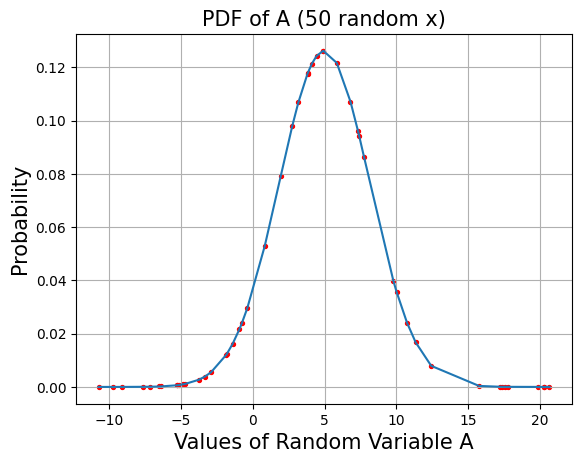

In [142]:
x = np.random.uniform(mean - 5*sd, mean + 5*sd, 50)
y = A.pdf(x)

xSorted = np.sort(x)
ySorted = A.pdf(xSorted)

plt.plot(xSorted, ySorted)
plt.scatter(x, y, color='red', s=8)
plt.xlabel('Values of Random Variable A', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.title('PDF of A (50 random x)', fontsize='15')
plt.grid(True)
plt.show()

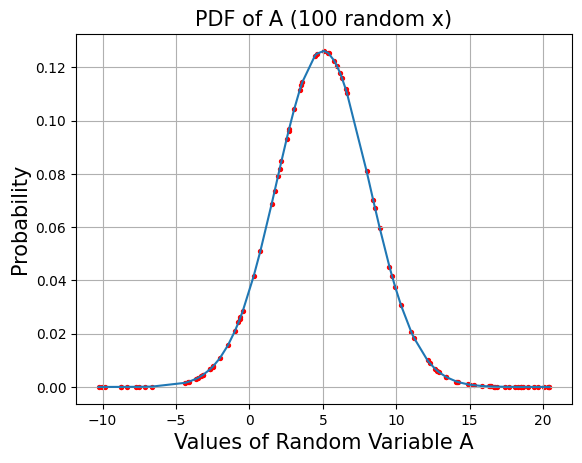

In [143]:
x = np.random.uniform(mean - 5*sd, mean + 5*sd, 100)
y = A.pdf(x)

xSorted = np.sort(x)
ySorted = A.pdf(xSorted)

plt.plot(xSorted, ySorted)
plt.scatter(x, y, color='red', s=8)
plt.xlabel('Values of Random Variable A', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.title('PDF of A (100 random x)', fontsize='15')
plt.grid(True)
plt.show()

From Wikipedia :In statistics, the 68–95–99.7 rule, also known as the empirical rule, is a shorthand used to remember the percentage of values that lie within an interval estimate in a normal distribution: 68%, 95%, and 99.7% of the values lie within one, two, and three standard deviations of the mean, respectively.

Verify the same using the above distribution. Mark the interval on the plot as well.

Hint : Use scipy.integrate

Probability to fall between 1.83772 and 8.16228 (±1σ): 68.269%
Probability to fall between -1.32456 and 11.32456 (±2σ): 95.450%
Probability to fall between -4.48683 and 14.48683 (±3σ): 99.730%


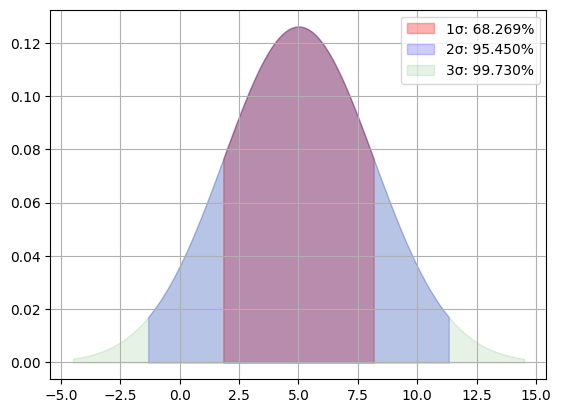

In [144]:
sigmaIntervals = [1, 2, 3]
colors = ['r', 'b', 'g']
alphas = [0.3, 0.2, 0.1]
#I chose these colors and alpha values because, after some trial and error,
#they turned out to be the best combination for producing an aesthetically pleasing chart.

for i, n in enumerate(sigmaIntervals):
    x1 = mean - n * sd
    x2 = mean + n * sd

    #I use the "_" because the quad function returns two values, and the second is the estimate of the integration error, which is not needed.
    prob, _ = integrate.quad(A.pdf, x1, x2)
    print('Probability to fall between {0:.5f} and {1:.5f} (±{2}σ): {3:.3f}%'.format(x1, x2, n, prob*100))

    needed_x = np.linspace(x1, x2, 100)
    needed_y = A.pdf(needed_x)
    plt.fill_between(needed_x, needed_y, color=colors[i], alpha=alphas[i], label=f'{n}σ: {prob*100:.3f}%')

plt.grid(True)
plt.legend()
plt.show()

To further test the rule, we can generate multiple data samples with the same distribution and check the percentage of values falling within each interval. Additionally, we can leverage the law of large numbers to observe how, as the sample size increases, the results converge more closely to the expected percentages.

In [145]:
sizes = [10, 100, 1000, 10000, 100000, 1000000, 10000000]

for size in sizes:
  randomPoints = A.rvs(size)

  print(f'Size of random points: {size}')

  for i, n in enumerate(sigmaIntervals):
      x1 = mean - n * sd
      x2 = mean + n * sd

      pointsInRange = np.sum((randomPoints >= x1) & (randomPoints <= x2))
      percentageInRange = (pointsInRange / size) * 100

      print(f'Percentage of points between {x1:.2f} and {x2:.2f} (±{n}σ): {percentageInRange:.3f}%')

  print('\n')

Size of random points: 10
Percentage of points between 1.84 and 8.16 (±1σ): 80.000%
Percentage of points between -1.32 and 11.32 (±2σ): 90.000%
Percentage of points between -4.49 and 14.49 (±3σ): 100.000%


Size of random points: 100
Percentage of points between 1.84 and 8.16 (±1σ): 70.000%
Percentage of points between -1.32 and 11.32 (±2σ): 97.000%
Percentage of points between -4.49 and 14.49 (±3σ): 100.000%


Size of random points: 1000
Percentage of points between 1.84 and 8.16 (±1σ): 69.700%
Percentage of points between -1.32 and 11.32 (±2σ): 95.300%
Percentage of points between -4.49 and 14.49 (±3σ): 99.600%


Size of random points: 10000
Percentage of points between 1.84 and 8.16 (±1σ): 68.920%
Percentage of points between -1.32 and 11.32 (±2σ): 95.670%
Percentage of points between -4.49 and 14.49 (±3σ): 99.770%


Size of random points: 100000
Percentage of points between 1.84 and 8.16 (±1σ): 68.310%
Percentage of points between -1.32 and 11.32 (±2σ): 95.405%
Percentage of points